In [1]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
cd /content/drive/"MyDrive/"

/content/drive/MyDrive


In [5]:

dataset = pd.read_csv('Colab Notebooks/Linear Regression/time_series_covid19_recovered_global.csv')

#/content/drive/MyDrive/Colab Notebooks/synchronousmachine.csv

In [6]:
dataset

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Analysing the dataset

In [7]:
dataset.shape

(265, 725)

In [8]:
type(dataset)

pandas.core.frame.DataFrame

In [9]:

dataf= pd.DataFrame(dataset)

In [10]:
dataf.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22
count,264.000000,264.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,...,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0,265.0
mean,18.731013,27.087363,0.113208,0.120755,0.147170,0.158491,0.211321,0.245283,0.407547,0.479245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,24.724885,73.922864,1.723944,1.727820,1.918076,1.982254,2.611285,2.807631,4.948211,5.442585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.454096,-10.007650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,19.254600,24.242250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,38.886675,91.814200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
col = list(dataset.columns.values)
print(col)

['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/2

In [12]:

col_value = (list(dataf.sum(axis = 0, skipna = True)))
#print(col_value)
df1 = pd.DataFrame(list(zip(col, col_value)),columns =['Title', 'Values'])

#df1.set_index('Title',inplace=True)
#print(df1)
#df1.drop(df1.index[["Province/State"]])

data = df1.drop(df1.index)
print(df1)



              Title                                             Values
0    Province/State  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
1    Country/Region                                        4944.987387
2               Lat                                        7151.063898
3              Long                                                 30
4           1/22/20                                                 32
..              ...                                                ...
719          1/6/22                                                  0
720          1/7/22                                                  0
721          1/8/22                                                  0
722          1/9/22                                                  0
723         1/10/22                                                  0

[724 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [13]:
col1 = list(df1.columns.values)
print(col1)


['Title', 'Values']


In [14]:
x_value=df1.iloc[4:,0:1]
y_value=df1.iloc[4:,1:2]

In [15]:
x_value

,Title
4,1/22/20
5,1/23/20
6,1/24/20
7,1/25/20
8,1/26/20
...,...
719,1/6/22
720,1/7/22
721,1/8/22
722,1/9/22


In [16]:

y_value

,Values
4,32
5,39
6,42
7,56
8,65
...,...
719,0
720,0
721,0
722,0


In [17]:
#cleaning the dataset
#remove the na values
training_dataset=df1
cleaned_dataset=training_dataset.dropna()

In [18]:
cleaned_dataset.shape

(724, 2)

In [19]:
cleaned_dataset

,Title,Values
0,Province/State,AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
1,Country/Region,4944.987387
2,Lat,7151.063898
3,Long,30
4,1/22/20,32
...,...,...
719,1/6/22,0
720,1/7/22,0
721,1/8/22,0
722,1/9/22,0


In [20]:
x_new = cleaned_dataset['Title']

In [21]:
y_new = cleaned_dataset['Values']

In [22]:
x_value1=cleaned_dataset.iloc[4:,0:1]
y_value1=cleaned_dataset.iloc[4:,1:2]
print(x_value1)


       Title
4    1/22/20
5    1/23/20
6    1/24/20
7    1/25/20
8    1/26/20
..       ...
719   1/6/22
720   1/7/22
721   1/8/22
722   1/9/22
723  1/10/22

[720 rows x 1 columns]


In [23]:
x_train = x_value1.values.reshape(x_value1.size)

In [24]:
y_train = y_value1.values.reshape(y_value1.size)

In [25]:
dates = x_value1['Title']
#print(dates)
date_format = [pd.to_datetime(d) for d in dates]
print(date_format)

[Timestamp('2020-01-22 00:00:00'), Timestamp('2020-01-23 00:00:00'), Timestamp('2020-01-24 00:00:00'), Timestamp('2020-01-25 00:00:00'), Timestamp('2020-01-26 00:00:00'), Timestamp('2020-01-27 00:00:00'), Timestamp('2020-01-28 00:00:00'), Timestamp('2020-01-29 00:00:00'), Timestamp('2020-01-30 00:00:00'), Timestamp('2020-01-31 00:00:00'), Timestamp('2020-02-01 00:00:00'), Timestamp('2020-02-02 00:00:00'), Timestamp('2020-02-03 00:00:00'), Timestamp('2020-02-04 00:00:00'), Timestamp('2020-02-05 00:00:00'), Timestamp('2020-02-06 00:00:00'), Timestamp('2020-02-07 00:00:00'), Timestamp('2020-02-08 00:00:00'), Timestamp('2020-02-09 00:00:00'), Timestamp('2020-02-10 00:00:00'), Timestamp('2020-02-11 00:00:00'), Timestamp('2020-02-12 00:00:00'), Timestamp('2020-02-13 00:00:00'), Timestamp('2020-02-14 00:00:00'), Timestamp('2020-02-15 00:00:00'), Timestamp('2020-02-16 00:00:00'), Timestamp('2020-02-17 00:00:00'), Timestamp('2020-02-18 00:00:00'), Timestamp('2020-02-19 00:00:00'), Timestamp('20

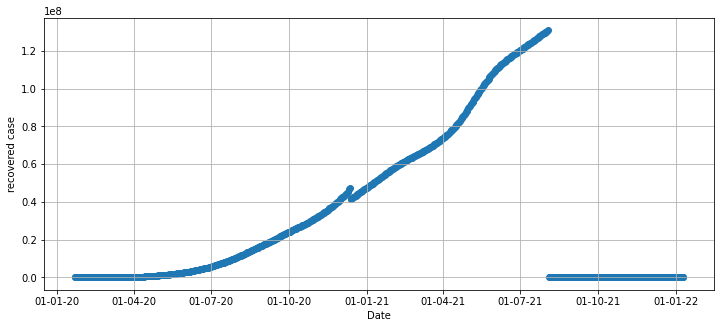

In [26]:
fig, ax = plt.subplots(figsize=(12, 5 ))
ax.grid()
ax.scatter(date_format,y_value1['Values'])
ax.set(xlabel="Date",ylabel="recovered case")
date_form = DateFormatter('%d-%m-%y')
#print(date_form)
ax.xaxis.set_major_formatter(date_form)
#ax.xaxis.set_major_locator(mdates.DayLocator(interval = 15))
plt.show()

In [27]:
df1['Time'] = np.arange(len(df1.index))

In [28]:
print(df1)

              Title                                             Values  Time
0    Province/State  AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...     0
1    Country/Region                                        4944.987387     1
2               Lat                                        7151.063898     2
3              Long                                                 30     3
4           1/22/20                                                 32     4
..              ...                                                ...   ...
719          1/6/22                                                  0   719
720          1/7/22                                                  0   720
721          1/8/22                                                  0   721
722          1/9/22                                                  0   722
723         1/10/22                                                  0   723

[724 rows x 3 columns]


In [29]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

# Training data
X = df1.loc[4:500, ['Time']]  # features
y = df1.loc[4:500, 'Values']  # target

reg = Lasso(alpha=1)
reg.fit(X,y)

y_pred1 = pd.Series(reg.predict(X), index=X.index)
print(y_pred1)

4     -2.006635e+07
5     -1.985660e+07
6     -1.964685e+07
7     -1.943711e+07
8     -1.922736e+07
           ...     
496    8.312825e+07
497    8.333799e+07
498    8.354774e+07
499    8.375748e+07
500    8.396723e+07
Length: 497, dtype: float64


In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X), y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X, y)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X, y)
mean_squared_error(y, lasso.predict(X))
pd.Series(lasso.coef_, index=X.columns)



In [32]:
from sklearn.linear_model import LinearRegression

# Training data
X = df1.loc[4:500, ['Time']]  # features
y = df1.loc[4:500, 'Values']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

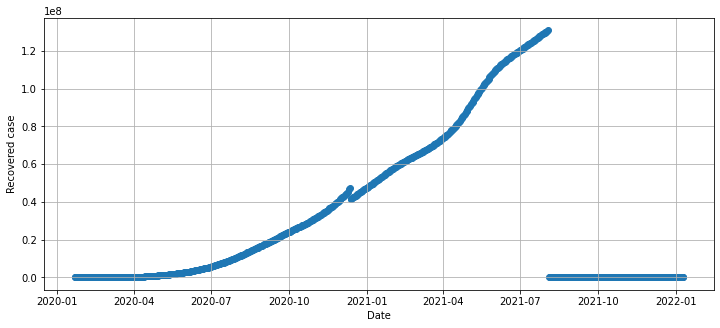

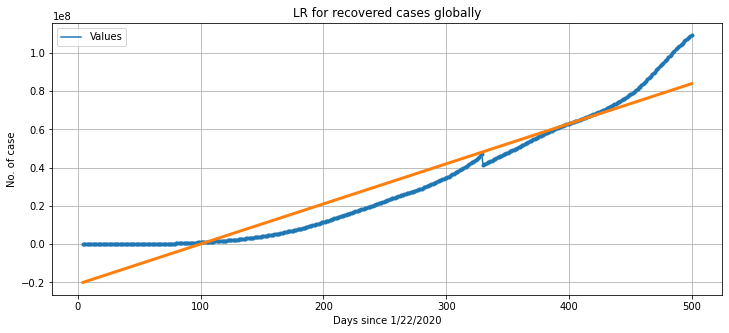

In [ ]:
plot_params = dict(
    style=".-",
    legend=True,
)

fig, ax = plt.subplots(figsize=(12, 5 ))
ax.grid()
ax.scatter(date_format,y_value1['Values'])
ax.set(xlabel="Date",ylabel="Recovered case")

fig, ax = plt.subplots(figsize=(12, 5 ))
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('LR for recovered cases globally');
ax.set(xlabel="Days since 1/22/2020",ylabel="No. of case")
ax.grid();

